<a href="https://colab.research.google.com/github/egggbeater/Colab-PEX19BS/blob/main/Colab_PEX19BS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab-PEX19BS**

Welcome to the Google Colab Notebook-based tool of the PEX19 binding site prediction calculation from [Rottensteiner et al. 2004](https://pubmed.ncbi.nlm.nih.gov/15133130/). When using this tool, please cite this article.

To use Colab-PEX19BS, simply run all the cells in order, following instructions to input data or file name before running the corresponding cell.

**1. Enter your protein FASTA sequence** and then press the play button on the cell. The sequence should be **at least 15 residues** long. An example sequence is provided (*Trypanosoma brucei* PEX11, UniProt).

In [25]:
# @title FASTA sequence entry {"display-mode":"form"}
fasta_seq = "MSEFQRFVKLLEQTDGRDKILKAFSGVFKALGSLDTCQSRSSAFGAVGKSIGDARCLLRMAKWVGDVPKMQNAIQDCRAKGKVNMKEVLKFLRVLCNFLYVLGDNVAFVARYNLLALRHKSIHLKAKTAQFWGFFLAAVLDVVALYGALQKRASDPATSKKEMKAALISFVKDASDTLVTMAFVGYLREVWRPSATTSGALTAVAGGVATYLNWNKIK" # @param {"type":"string","placeholder":"Enter FASTA sequence here..."}
fasta_seq = fasta_seq.upper()

fasta_list = [i for i in fasta_seq if i != ' ']

non_dna = ['E','F','I','L','P','Q']
non_dna_res = 0

AA_all = 'ACDEFGHIKLMNPQRSTVWY'
AA_loc_dict = {}
AA_index = 0
for AA in AA_all:
    AA_loc_dict[AA] = AA_index
    AA_index += 1

fasta_seq_clean = ""
fasta_list_clean = []

non_AA = False
for i in fasta_list:
  if i not in AA_all:
    non_AA = True
  else:
    fasta_seq_clean = fasta_seq_clean + i
    fasta_list_clean.append(i)
  if i in non_dna:
    non_dna_res += 1

if non_dna_res == 0:
  print("This appears to be a DNA sequence. Please check your input before proceeding.")

if non_AA == True:
  print("There are one or more non-amino acid characters in your sequence which were removed. Please check your input before proceeding.")

if fasta_list == []:
  print("Error: Invalid sequence format. Please check your input and try again.")
elif len(fasta_list_clean) < 15:
  print("Error: Sequence too short. Please enter a FASTA sequence of at least 15 residues.")
else:
  print("Sequence: " + fasta_seq_clean)

There are one or more non-amino acid characters in your sequence which were removed. Please check your input before proceeding.
Sequence: THEQICKRWNFMPSVERTHELAYDG


**2. Calculate PEX19 binding site scores** (press the play button).



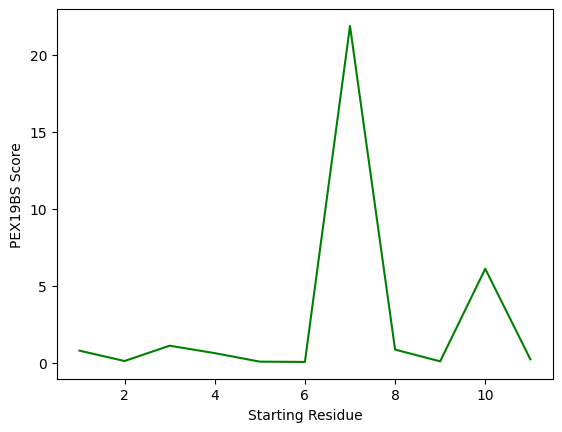

The maximum score was 21.867 with peptide KRWNFMPSVERTHEL
Top 10 PEX19BS scores: 
 Starting Residue        Sequence  PEX19BS score
                7 KRWNFMPSVERTHEL         21.867
               10 NFMPSVERTHELAYD          6.098
                3 EQICKRWNFMPSVER          1.103
                8 RWNFMPSVERTHELA          0.850
                1 THEQICKRWNFMPSV          0.782
                4 QICKRWNFMPSVERT          0.621
               11 FMPSVERTHELAYDG          0.223
                2 HEQICKRWNFMPSVE          0.108
                9 WNFMPSVERTHELAY          0.087
                5 ICKRWNFMPSVERTH          0.068


In [26]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import files

score_table = np.array([
    [ 0,0, 1, 2, 3,      4,      5,      6,      7,      8,      9,      10,    11,     12,13,14],
    [ 0,0, 0, 0, 0,  0.253, -0.193,  0.437, -0.490,  2.637,  0.187,  0.400,  1.020,  0.231, 0, 0],
    [ 1,0, 0, 0, 0,  0.267, -0.628, -1.308,  0.733,  2.429,  0.092,  0.003,  0.833,  0.182, 0, 0],
    [ 2,0, 0, 0, 0,  0.265, -1.068, -0.924, -0.510, -1.160, -0.295,  0.029, -0.983, -0.684, 0, 0],
    [ 3,0, 0, 0, 0, -0.181, -0.386,  0.064, -0.046, -1.755, -1.857,  0.089, -0.056, -0.490, 0, 0],
    [ 4,0, 0, 0, 0,  1.582,  0.992, -0.601,  0.839,  2.072,  0.608,  0.388,  1.184,  0.144, 0, 0],
    [ 5,0, 0, 0, 0, -0.980, -0.317, -0.660, -0.762, -1.796, -0.064, -0.585, -0.951, -0.395, 0, 0],
    [ 6,0, 0, 0, 0, -0.762,  0.022,  0.490, -0.248, -2.261, -0.114,  0.148,  0.309, -0.263, 0, 0],
    [ 7,0, 0, 0, 0,  1.178,  0.686,  0.272,  0.936,  2.870,  0.581,  0.013,  1.102,  0.717, 0, 0],
    [ 8,0, 0, 0, 0, -2.758,  0.521,  0.557, -0.642, -2.226,  0.441,  0.271, -1.483, -0.293, 0, 0],
    [ 9,0, 0, 0, 0,  1.657,  0.749,  0.185,  1.201,  2.927,  0.693,  0.615,  1.473,  0.900, 0, 0],
    [10,0, 0, 0, 0,  0.243,  0.499, -0.221, -0.025, -0.012, -0.179,  0.083, -0.011, -0.497, 0, 0],
    [11,0, 0, 0, 0, -0.453, -2.062, -0.521, -0.662, -1.504, -1.218, -1.135, -0.166, -0.283, 0, 0],
    [12,0, 0, 0, 0, -1.919, -0.590, -0.246, -3.189, -1.771, -1.176, -0.397, -3.798, -1.060, 0, 0],
    [13,0, 0, 0, 0, -0.841,  0.340,  0.066,  0.574, -2.149,  0.259,  0.420,  0.408,  0.922, 0, 0],
    [14,0, 0, 0, 0, -0.470,  0.648,  0.695, -0.428, -1.471,  0.263,  0.362,  0.101,  1.011, 0, 0],
    [15,0, 0, 0, 0, -0.258, -0.357,  0.822,  0.115, -0.997,  0.179,  0.179,  0.253,  0.099, 0, 0],
    [16,0, 0, 0, 0,  1.284,  0.067,  0.290,  0.239, -0.026,  0.174, -0.227,  0.126, -0.091, 0, 0],
    [17,0, 0, 0, 0,  0.977,  0.777,  0.184,  1.263,  2.767,  0.778, -0.122,  0.803,  0.695, 0, 0],
    [18,0, 0, 0, 0,  0.754,  0.372,  0.426,  0.802,  0.976,  0.612,  0.113,  1.154, -0.304, 0, 0],
    [19,0, 0, 0, 0,  0.163, -0.072, -0.005,  0.299,  0.448,  0.035, -0.647,  1.317, -0.541, 0, 0]
])

scorer = pd.DataFrame(data=score_table[1:,1:], index=score_table[1:,0])

total_iters = len(fasta_list_clean) - 14

all_scores = []
all_seqs = []
x = []
for i in range(total_iters):
    peptide = fasta_list_clean[i:i+15]
    peptide_clean = ''.join(peptide)
    all_seqs.append(peptide_clean)
    x.append(i+1)
    peptide_score = 0
    peptide_dex = 0
    for AA in peptide:
        if AA not in AA_loc_dict:
            continue
        AA_decoded = AA_loc_dict[AA]
        score_ind = scorer.iloc[AA_decoded,peptide_dex]
        peptide_score += score_ind
        peptide_dex += 1
    score_adj = math.exp(peptide_score)
    score_adj = round(score_adj,3)
    all_scores.append(score_adj)

scores_seqs = list(zip(x,all_seqs,all_scores))
df_score_seq = pd.DataFrame(scores_seqs, columns=['Starting Residue','Sequence', 'PEX19BS score'])
df_sort = df_score_seq.sort_values(by='PEX19BS score', ascending=False)

plt.plot(x, all_scores, color='green')
plt.xlabel('Starting Residue')
plt.ylabel('PEX19BS Score')
plt.show()

max_all = max(all_scores)
max_index = all_scores.index(max_all)
max_res = all_seqs[max_index]

print("The maximum score was {0} with peptide {1}".format(max_all, max_res))
print("Top " + str(10) + " PEX19BS scores: ")
print(df_sort[:10].to_string(index=False))

**3.** (Optional) **Export and download all PEX19 binding site scores as .csv** by entering file name and pressing play button.

In [ ]:
file_name = "PEX19BS_scores" # @param {"type":"string","placeholder":"Enter .csv file name here:"}
df_score_seq.to_csv('{0}.csv'.format(file_name), index=False)

print("File exported to csv.")

file_download = file_name + ".csv"

files.download(file_download)